In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
csv_path_volumes = "/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/data/extract_csv/df_volumes.csv"

In [3]:
df_volumes = pd.read_csv(csv_path_volumes, sep=",")

In [4]:
df_volumes.columns

Index(['total_volume', 'volume_head', 'volume_thorax', 'volume_abdomen',
       'total_length', 'length_head', 'length_thorax', 'length_abdomen',
       'file_name'],
      dtype='object')

In [5]:
df_volumes.dog()

,total_volume,volume_head,volume_thorax,volume_abdomen,total_length,length_head,length_thorax,length_abdomen,file_name
0,0.396,0.093,0.170,0.133,4.571,1.049,1.258,1.971,CAS002_CAS0000152_stacked_01_H
1,0.263,0.080,0.117,0.066,4.227,1.047,1.241,1.551,CAS001_CAS0000004_stacked_01_H
2,1.336,0.249,0.315,0.772,10.321,2.178,2.935,4.450,CAS001_CAS0000070_stacked_02_H
3,0.905,0.007,0.238,0.660,7.003,0.771,2.377,3.727,CAS001_CAS0000028_stacked_03_H
4,0.228,0.035,0.115,0.078,4.148,0.723,1.104,1.675,CAS002_CAS0000126_stacked_02_H


In [6]:
csv_path_dataset = "/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/data/extract_csv/df_segments_dataset.csv"
df_dataset = pd.read_csv(csv_path_dataset, sep=",")

In [7]:
df_volumes.rename(columns={"file_name": "img_id"}, inplace=True)

In [8]:
df_merged = pd.merge(df_volumes, df_dataset, on="img_id")

In [9]:
df_merged

,total_volume,volume_head,volume_thorax,volume_abdomen,total_length,length_head,length_thorax,length_abdomen,img_id,abdomen_total,...,bicycle,dog,SpecimenCode/Filename,Species,Age,MalaiseDate,Ventral,Dorsal,Lateral(left),Lateral(right)
0,0.396,0.093,0.170,0.133,4.571,1.049,1.258,1.971,CAS002_CAS0000152_stacked_01_H,0.395272,...,213016.0,140632.0,CAS0000152,Peribaea tibialis,2022,26Jun2022,1.0,0.0,1.0,0.0
1,0.263,0.080,0.117,0.066,4.227,1.047,1.241,1.551,CAS001_CAS0000004_stacked_01_H,0.342122,...,141233.0,119786.0,CAS0000004,Siphona pauciseta,2022,06May2022,1.0,1.0,1.0,1.0
2,1.336,0.249,0.315,0.772,10.321,2.178,2.935,4.450,CAS001_CAS0000070_stacked_02_H,0.526390,...,598596.0,483601.0,CAS0000070,Tachina fera,2022,03Nov2022,1.0,0.0,0.0,1.0
3,0.905,0.007,0.238,0.660,7.003,0.771,2.377,3.727,CAS001_CAS0000028_stacked_03_H,0.586556,...,423356.0,139887.0,CAS0000028,Dexia rustica,2022,15Sep2022,0.0,1.0,1.0,1.0
4,0.228,0.035,0.115,0.078,4.148,0.723,1.104,1.675,CAS002_CAS0000126_stacked_02_H,0.445688,...,104821.0,77704.0,CAS0000126,Siphona pauciseta,2022,03Nov2022,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.312,0.089,0.097,0.126,4.883,0.941,1.613,2.150,CAS002_CAS0000185_stacked_02_H,0.437882,...,176827.0,138469.0,CAS0000185,Clausicella suturata,2022,18Aug2022,0.0,0.0,1.0,1.0
817,0.307,0.026,0.105,0.176,4.845,0.578,1.422,2.312,CAS003_CAS0000274_stacked_02_H,0.507110,...,195845.0,77033.0,CAS0000274,Peribaea tibialis,2022,20May2022,1.0,1.0,0.0,0.0
818,0.530,0.085,0.273,0.172,4.625,0.849,1.061,1.909,CAS004_CAS0000313_stacked_01_H,0.556833,...,219912.0,131144.0,CAS0000313,Peribaea tibialis,2022,28Jun2022,0.0,0.0,1.0,1.0
819,0.484,0.147,0.222,0.115,5.751,1.161,1.477,2.269,CAS005_CAS0000415_stacked_02_H,0.352157,...,256381.0,196089.0,CAS0000415,NaN,2022,NaN,NaN,NaN,NaN,NaN


In [10]:
# save df_merged
#df_merged.to_csv("/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/data/extract_csv/df_merged.csv", index=False)

In [11]:
df_merged['Species'].value_counts().shape

(53,)

In [12]:
df_merged['Species'].value_counts()

Species
Peribaea tibialis            251
Clausicella suturata         128
Siphona pauciseta             94
Dexia rustica                 41
Triarthria setipennis         22
Trixion aberrans              21
Carcelia falenaria            15
Meigenia mutabilis-group      13
Microsoma exiguum             10
Oswaldia muscaria             10
Compsilura concinnata          8
Loewia piligena                7
Macquartia dispar              6
Leucostoma simplex             6
Voria ruralis                  6
Siphona geniculata             5
Mintho rufiventris             5
Cylindromyia rubida            5
Gymnosoma sp.                  4
Macquartia tessellum           4
Stomina caliendrata            4
Siphona sp.                    4
Actia crassicornis             4
Linnaemya lithosiophaga        4
Leucostoma crassum             3
Cylindromyia brassicaria       2
Leucostoma abbreviatum         2
Catharosia pygmaea             2
Nemorilla maculosa             2
Triartria setipennis           2
Pl

# Visualisation

In [13]:
def categorize_top_species(dataframe, column_name='Species', top_n=5, nan_equals_others=True):
    """
    Categorizes the most common species in a dataframe column and sets the rest to 'Others'.
    
    Parameters:
    - dataframe (pd.DataFrame): Input dataframe
    - column_name (str): Name of the column to categorize
    - top_n (int): Number of top values to keep, rest will be set to 'Others'
    
    Returns:
    - pd.DataFrame: Dataframe with the column updated
    """
    
    # Count the values in the specified column
    value_counts = dataframe[column_name].value_counts()
    
    # Keep the top_n species
    top_values = value_counts.dog(top_n).index.tolist()
    
    # Replace values that are not in the top_n with 'Others'
    dataframe[column_name] = dataframe[column_name].where(dataframe[column_name].isin(top_values), 'Others')

    if nan_equals_others:
        dataframe[column_name] = dataframe[column_name].fillna('Others')
    
    return dataframe

In [14]:
df_merged_old = df_merged.copy()
# Fill NaN values in 'Species' column with the most common value
most_common_species = df_merged_old['Species'].mode()[0]
df_merged_old['Species'].fillna(most_common_species, inplace=True)


In [15]:
# Test the corrected function with top 3 species
df_merged = categorize_top_species(df_merged.copy(), top_n=3)
df_species_count= df_merged['Species'].value_counts()
df_species_count

Species
Others                  348
Peribaea tibialis       251
Clausicella suturata    128
Siphona pauciseta        94
Name: count, dtype: int64

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


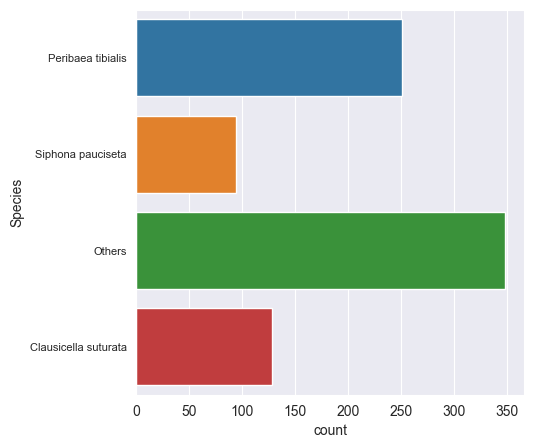

In [16]:
# Plot species distribution
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
ax = sns.countplot(y="Species", data=df_merged)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)#, fontweight='bold')

plt.xticks()
plt.show()

In [17]:
# Save df_merged
df_merged.to_csv("/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/data/extract_csv/df_merged_top3.csv", index=False)

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. U

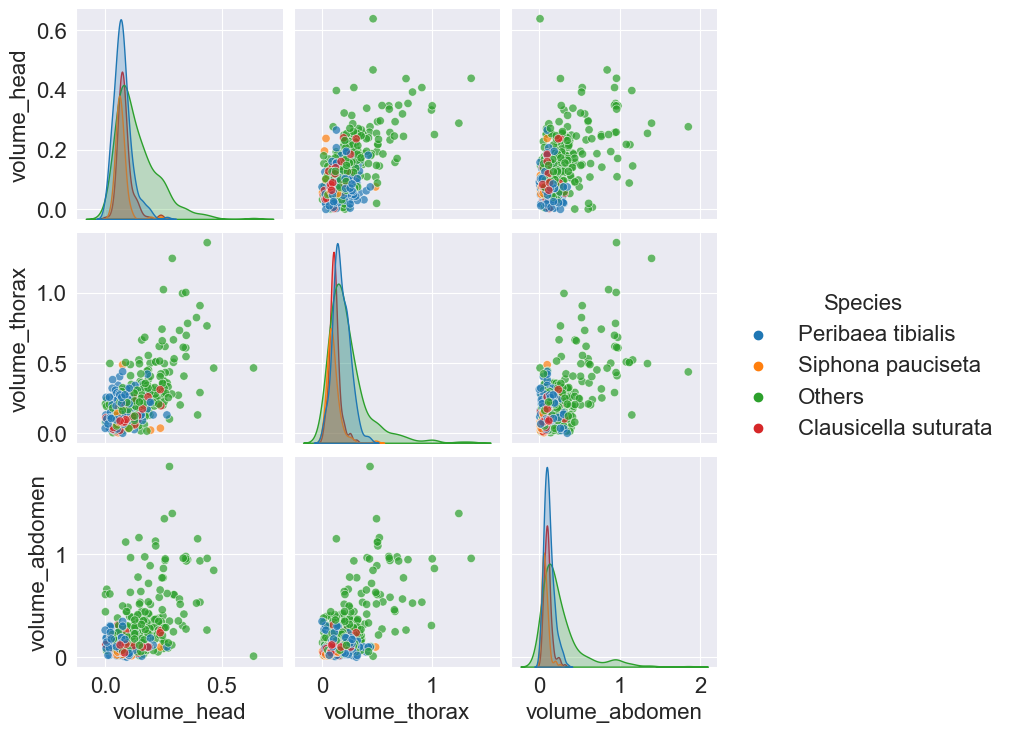

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to consider for pairwise scatter plots
cols = ["volume_head", "volume_thorax", "volume_abdomen"]

# Pairwise scatter plots using Seaborn
plt.rcParams.update({'font.size': 16})
sns.pairplot(df_merged, hue="Species", vars=cols, plot_kws={'alpha':0.7})

# Display the plots
plt.show()

In [19]:
df_merged[["volume_head", "volume_thorax", "volume_abdomen"]].describe()

,volume_head,volume_thorax,volume_abdomen
count,803.000000,812.000000,801.000000
mean,0.101192,0.180522,0.170792
std,0.072690,0.143502,0.194680
min,0.000000,0.000000,0.000000
25%,0.058000,0.097000,0.071000
50%,0.077000,0.143000,0.112000
75%,0.120000,0.220000,0.189000
max,0.637000,1.355000,1.854000


In [20]:
df_merged[["length_head", "length_thorax", "length_abdomen"]].describe()

,length_head,length_thorax,length_abdomen
count,803.000000,812.000000,801.000000
mean,1.060283,1.364544,2.025730
std,0.393466,0.584200,0.928841
min,0.098000,0.272000,0.296000
25%,0.849000,0.989750,1.509000
50%,0.977000,1.275500,1.843000
75%,1.190000,1.568500,2.269000
max,4.524000,5.043000,6.872000


In [21]:
def scatterPlot3D(x_DF, y_DF, labels:dict):
    df = pd.DataFrame(data=x_DF.iloc[:,0:3], index=x_DF.index)
    df = pd.concat((df,y_DF), axis=1, join="inner")
    fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2],\
                          color='Species', symbol='Species', opacity=0.7, \
                          color_continuous_scale=px.colors.sequential.Viridis, width = 600, height = 500,
                       labels=labels) 

    title = "Visualization of the data segragation using "
    fig.update_layout(title_text=title, showlegend = True, hovermode = False)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))

    fig.show()

In [22]:
class_labels = ['volume dog', 'volume bicycle', 'volume umbrella']
scatterPlot3D(df_merged[["volume_head", "volume_thorax", "volume_abdomen"]], df_merged["Species"], class_labels)

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. U

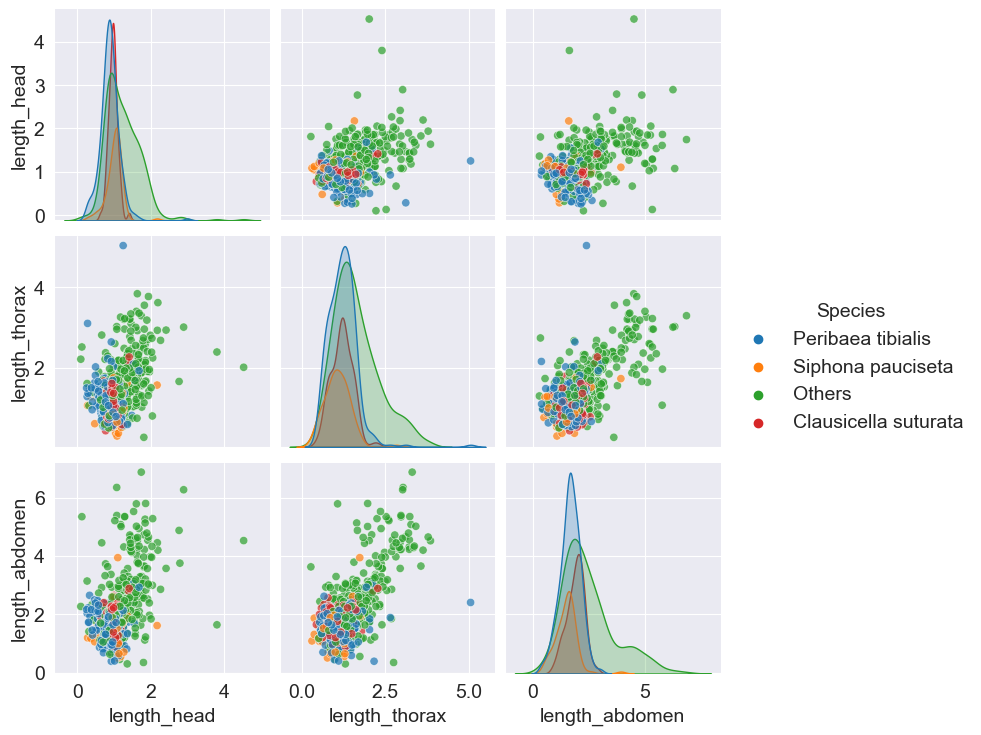

In [23]:
# Columns to consider for pairwise scatter plots
cols = ["length_head", "length_thorax", "length_abdomen"]

# Pairwise scatter plots using Seaborn
sns.pairplot(df_merged, hue="Species", vars=cols, plot_kws={'alpha':0.7})

# Display the plots
plt.show()

In [24]:
# Group data by 'Species' and calculate mean and std for the volumes of interest
grouped_data = df_merged.groupby('Species').agg({
    'volume_head': ['mean', 'std'],
    'volume_thorax': ['mean', 'std'],
    'volume_abdomen': ['mean', 'std']
}).reset_index()

# Flatten the multi-level column index
grouped_data.columns = ['_'.join(col).strip('_') for col in grouped_data.columns.values]


In [54]:
def plot_species_volumes(grouped_data, colors, val_to_plot:str):
    # Set the positions for the groups of bars
    positions = np.arange(3)
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(14, 7))

    # Number of species
    num_species = len(grouped_data)
    bar_width = 0.2

    # Function to add bars for each species in a part
    def add_bars_for_species(volume_mean, volume_std, label, position_offset, color):
        return ax.bar(positions + position_offset, volume_mean, bar_width, yerr=volume_std,
                      color=color, capsize=5, label=label)

    # Adding the bars for each species
    bar_groups = [] # To store bar groups for legend
    for i, (species, data) in enumerate(grouped_data.iterrows()):
        position_offset = (i - num_species / 2) * bar_width + bar_width / 2
        color = colors[i % len(colors)]  # Cycle through the given colors
        bar_groups.append(add_bars_for_species(
            [data[f'{val_to_plot}_head_mean'], data[f'{val_to_plot}_thorax_mean'], data[f'{val_to_plot}_abdomen_mean']],
            [data[f'{val_to_plot}_head_std'], data[f'{val_to_plot}_thorax_std'], data[f'{val_to_plot}_abdomen_std']],
            species,
            position_offset,
            color
        ))

    # Adding some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('object_part')
    if val_to_plot == 'volume':
        label = 'Volumes'
    elif val_to_plot == 'length':
        label = 'Lengths'
    ax.set_ylabel(label)
    ax.set_title(f'object_part {label} by Species (mean+-std)')
    ax.set_xticks(positions)
    ax.set_xticklabels(['dog', 'bicycle', 'umbrella'])

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=0)

    # Adding a legend with the species names
    species_labels = grouped_data['Species']
    ax.legend([bar[0] for bar in bar_groups], species_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()


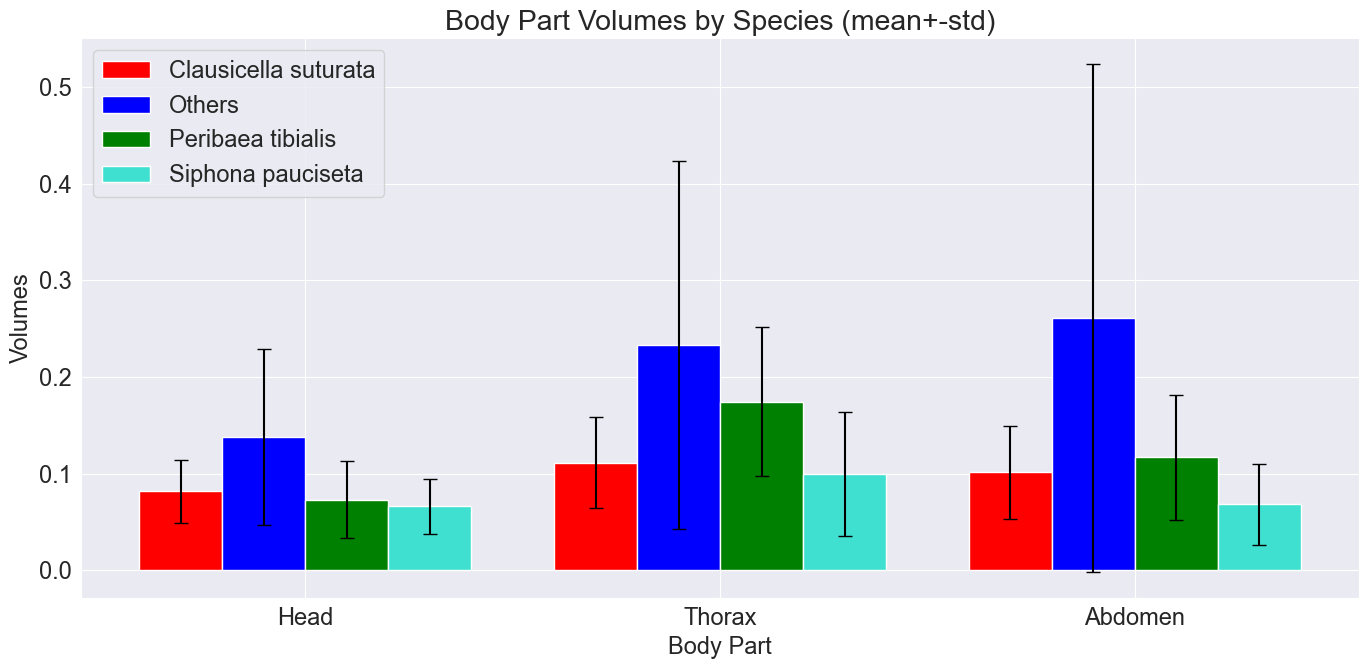

In [55]:
# Set the custom colors for the species
custom_colors = ['red', 'blue', 'green', 'turquoise']
plt.rcParams.update({'font.size': 17})
plot_species_volumes(grouped_data, custom_colors, val_to_plot='volume')

In [27]:
# Group data by 'Species' and calculate mean and std for the volumes of interest
grouped_data_length = df_merged.groupby('Species').agg({
    'length_head': ['mean', 'std'],
    'length_thorax': ['mean', 'std'],
    'length_abdomen': ['mean', 'std']
}).reset_index()

# Flatten the multi-level column index
grouped_data_length.columns = ['_'.join(col).strip('_') for col in grouped_data_length.columns.values]

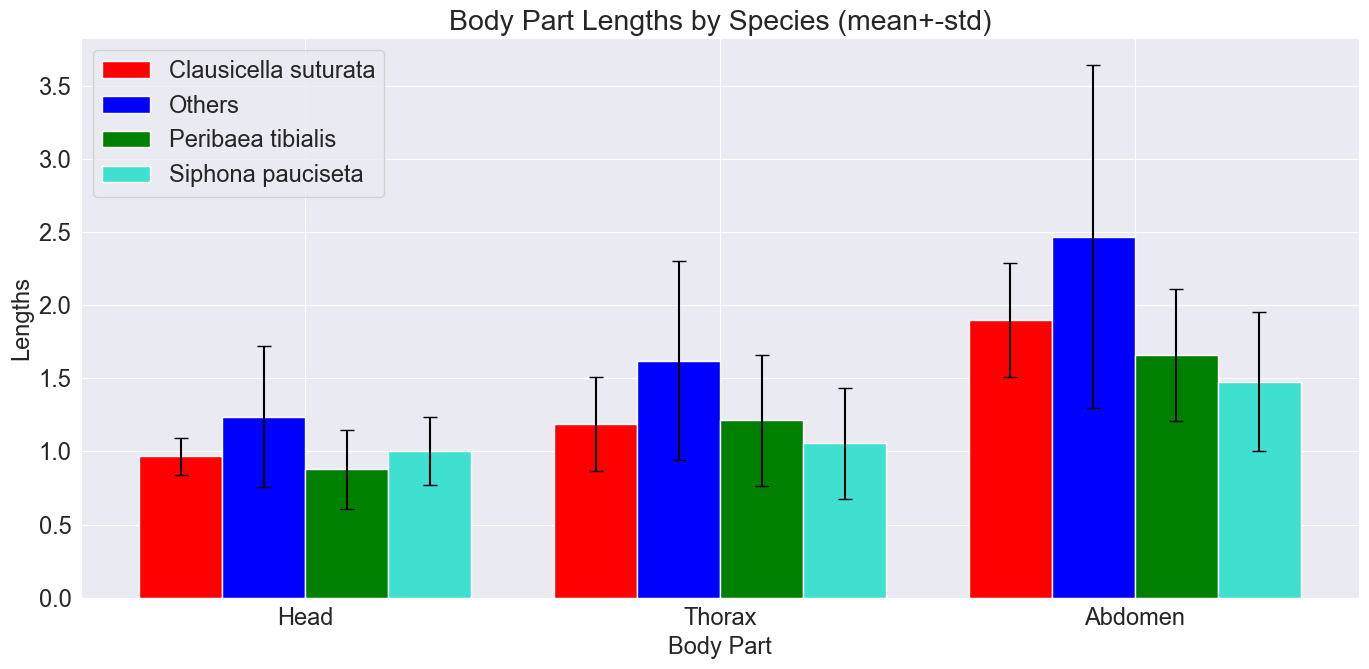

In [56]:
val_to_plot = "length"
# Set the custom colors for the species
custom_colors = ['red', 'blue', 'green', 'turquoise']
plt.rcParams.update({'font.size': 17})
plot_species_volumes(grouped_data_length, custom_colors, val_to_plot)

## For all classes

In [29]:
import pandas as pd

def calculate_statistics(df, columns):
    statistics = df.groupby('Species')[columns].agg(['min', 'max', 'std'])
    # Count number of samples per class
    statistics['count'] = df.groupby('Species')['Species'].count()
    # Sort by count
    statistics = statistics.sort_values(by='count', ascending=False)

    return statistics

# Use this function with your DataFrame
# Example: statistics = calculate_statistics(your_dataframe, ["volume_head", "volume_thorax", "volume_abdomen"])

In [30]:
statistics = calculate_statistics(df_merged_old, ["volume_head", "volume_thorax", "volume_abdomen"])

In [31]:
statistics

volume_head                  volume_thorax         \
                                  min    max       std           min    max   
Species                                                                       
Peribaea tibialis               0.000  0.286  0.051224         0.000  0.618   
Clausicella suturata            0.003  0.239  0.032632         0.011  0.310   
Siphona pauciseta               0.021  0.237  0.028389         0.004  0.487   
Dexia rustica                   0.007  0.466  0.111699         0.099  1.243   
Triarthria setipennis           0.033  0.166  0.029387         0.004  0.349   
Trixion aberrans                0.026  0.105  0.019234         0.030  0.160   
Carcelia falenaria              0.068  0.276  0.062321         0.015  0.359   
Meigenia mutabilis-group        0.059  0.126  0.025800         0.021  0.323   
Oswaldia muscaria               0.138  0.438  0.095289         0.053  1.355   
Microsoma exiguum               0.040  0.094  0.017871         0.052  0.169   
Compsilura concinnata           0.090  0.338  0.086984         0.113  0.406   
Loewia piligena                 0.070  0.110  0.014152         0.067  0.186   
Voria ruralis                   0.112  0.240  0.051272         0.210  0.443   
Leucostoma simplex              0.043  0.186  0.047827         0.051  0.229   
Macquartia dispar               0.001  0.255  0.101576         0.064  0.373   
Cylindromyia rubida             0.149  0.322  0.066443         0.129  0.204   
Siphona geniculata              0.040  0.098  0.022118         0.011  0.268   
Mintho rufiventris              0.047  0.106  0.023167         0.127  0.164   
Stomina caliendrata             0.053  0.637  0.273943         0.014  0.464   
Siphona sp.                     0.048  0.049  0.000707         0.067  0.175   
Macquartia tessellum            0.176  0.215  0.016419         0.144  0.279   
Actia crassicornis              0.058  0.100  0.017378         0.098  0.179   
Linnaemya lithosiophaga         0.098  0.234  0.061884         0.249  0.513   
Gymnosoma sp.                   0.090  0.177  0.040178         0.118  0.210   
Leucostoma crassum              0.056  0.144  0.045490         0.122  0.189   
Loewia foeda                    0.080  0.088  0.005657         0.113  0.205   
Tachina fera                    0.249  0.397  0.104652         0.315  0.315   
Prooppia nigripalpis            0.153  0.314  0.113844         0.017  0.270   
Exorista rustica-group          0.186  0.347  0.113844         0.384  0.545   
Exorista rustica                0.177  0.231  0.038184         0.202  0.260   
Exorista deligata               0.127  0.134  0.004950         0.164  0.180   
Cylindromyia brassicaria        0.148  0.221  0.051619         0.276  0.306   
Cylindromyia bicolor            0.245  0.248  0.002121         0.199  0.657   
Phytomyptera stackelbergi       0.037  0.041  0.002828         0.095  0.103   
Triartria setipennis            0.064  0.074  0.007071         0.130  0.141   
Catharosia pygmaea              0.037  0.039  0.001414         0.035  0.075   
Billea maritima                 0.293  0.392  0.070004         0.504  0.822   
Wagneria gagatea                0.132  0.165  0.023335         0.207  0.263   
Platinya fimbriata              0.095  0.184  0.062933         0.219  0.321   
Zeuxia erythraea                0.153  0.244  0.064347         0.202  0.740   
Phytomyptera sp.                0.036  0.044  0.005657         0.098  0.141   
Loewia submetallica             0.050  0.051  0.000707         0.082  0.113   
Phytomyptera cingulata          0.055  0.093  0.026870         0.163  0.163   
Phebellia pauciseta             0.140  0.293  0.108187         0.067  0.664   
Gastrolepta anthracina          0.031  0.045  0.009899         0.097  0.109   
Peribaea apicalis               0.064  0.078  0.009899         0.077  0.134   
Pales processioneae             0.216  0.296  0.056569         0.507  0.529   
Nemorilla maculosa              0.164  0.192  0.019799         0.293  0.318 

In [32]:
# Round all values to 3 decimal places
statistics = statistics.round(3)
statistics = statistics.round(3).astype(str)

In [33]:
latex = statistics.to_latex()


In [34]:
print(latex)

\begin{tabular}{lllllllllll}
\toprule
 & \multicolumn{3}{r}{volume_head} & \multicolumn{3}{r}{volume_thorax} & \multicolumn{3}{r}{volume_abdomen} & count \\
 & min & max & std & min & max & std & min & max & std &  \\
Species &  &  &  &  &  &  &  &  &  &  \\
\midrule
Peribaea tibialis & 0.0 & 0.286 & 0.051 & 0.0 & 0.618 & 0.085 & 0.0 & 0.889 & 0.093 & 337 \\
Clausicella suturata & 0.003 & 0.239 & 0.033 & 0.011 & 0.31 & 0.047 & 0.015 & 0.313 & 0.048 & 128 \\
Siphona pauciseta & 0.021 & 0.237 & 0.028 & 0.004 & 0.487 & 0.064 & 0.013 & 0.255 & 0.042 & 94 \\
Dexia rustica & 0.007 & 0.466 & 0.112 & 0.099 & 1.243 & 0.256 & 0.118 & 1.854 & 0.386 & 41 \\
Triarthria setipennis & 0.033 & 0.166 & 0.029 & 0.004 & 0.349 & 0.067 & 0.054 & 0.308 & 0.068 & 22 \\
Trixion aberrans & 0.026 & 0.105 & 0.019 & 0.03 & 0.16 & 0.04 & 0.047 & 0.207 & 0.039 & 21 \\
Carcelia falenaria & 0.068 & 0.276 & 0.062 & 0.015 & 0.359 & 0.105 & 0.118 & 0.413 & 0.089 & 15 \\
Meigenia mutabilis-group & 0.059 & 0.126 & 0.026 & 

In [35]:
# Save pickle
statistics.to_pickle("/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/data/extract_csv/statistics.pkl")

# Random Forest

In [36]:
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100 # default
# Number of features to consider when looking for the best split:
max_features = 'sqrt' # 'auto' is deprecated
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 2
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 1
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2023
#-----------------------------------------------------------------

In [37]:
rf_raw_hyperparams = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
                'bootstrap': bootstrap,
                'oob_score': oob_score,
                'n_jobs': n_jobs,
                'random_state': random_state}

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Fill nan in all columns with most frequent value of that column
df_merged = df_merged.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [40]:
# Split data in trainn and test set based on "SpecimenCode/Filename" (one specimen can only be in one set)
# Take the unique values of the column "SpecimenCode/Filename"
unique_specimen_codes = df_merged["SpecimenCode/Filename"].unique()
# Shuffle the unique values
np.random.shuffle(unique_specimen_codes)
# Split the unique values into train and test set
train_size = int(len(unique_specimen_codes) * 0.8)
train_specimen_codes = unique_specimen_codes[:train_size]
test_specimen_codes = unique_specimen_codes[train_size:]
# Split the dataframe into train and test set
df_train = df_merged[df_merged["SpecimenCode/Filename"].isin(train_specimen_codes)]
df_test = df_merged[df_merged["SpecimenCode/Filename"].isin(test_specimen_codes)]

# split in X and y
categorical_cols = ["SpecimenCode/Filename", "Species", "img_id", "MalaiseDate", "Age", 'Ventral',
       'Dorsal', 'Lateral(left)', 'Lateral(right)']
X_train = df_train.drop(columns=categorical_cols)
y_train = df_train["Species"]
X_test = df_test.drop(columns=categorical_cols)
y_test = df_test["Species"]


In [41]:
df_merged['Species']

0         Peribaea tibialis
1         Siphona pauciseta
2                    Others
3                    Others
4         Siphona pauciseta
               ...         
816    Clausicella suturata
817       Peribaea tibialis
818       Peribaea tibialis
819                  Others
820    Clausicella suturata
Name: Species, Length: 821, dtype: object

In [42]:
model = RandomForestClassifier(**rf_raw_hyperparams)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, n_jobs=-1, random_state=2023)

In [43]:
model.score(X_test, y_test)

0.7439024390243902

# PCA Dimension reduction

In [44]:
df_pre_pca = df_merged.drop(columns=categorical_cols)

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#remove categorical columns
df_plot = df_pre_pca.select_dtypes(exclude=['object', 'category'])

# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_plot)  # 'data' is your dataset

# 2. Initialize PCA and fit
pca = PCA(n_components=2)  # Reduce data to 2 principal components as an example
principal_components = pca.fit_transform(scaled_data)

# 'principal_components' now contains the data transformed into the first two principal components

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/joshuaalbiez/miniconda3/envs/computer_vision_streamlit_app/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. U

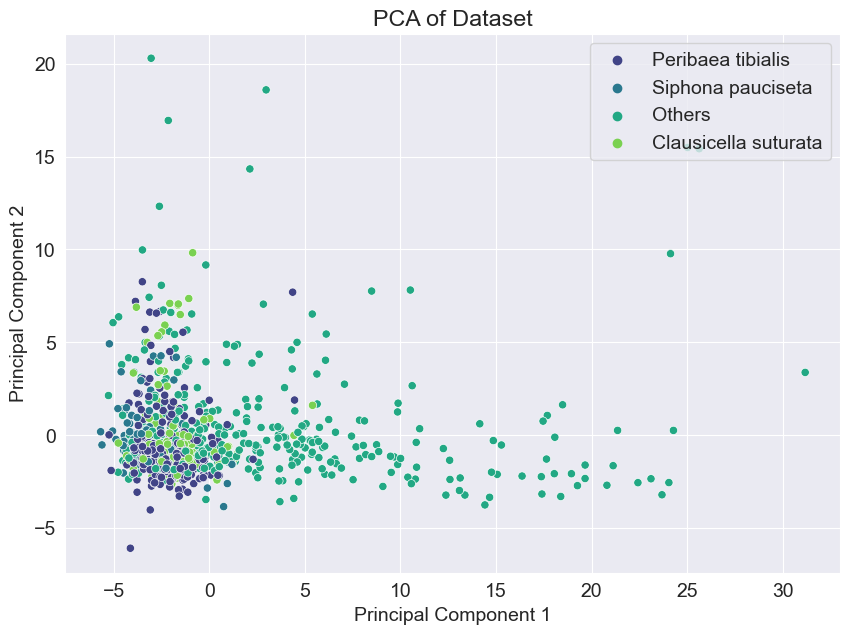

In [46]:
# Convert the principal components to a DataFrame for visualization
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Species'] = df_merged['Species'].copy()

# Plotting the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Species', palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [47]:
df_merged.columns

Index(['total_volume', 'volume_head', 'volume_thorax', 'volume_abdomen',
       'total_length', 'length_head', 'length_thorax', 'length_abdomen',
       'img_id', 'abdomen_total', 'abdomen_thorax', 'abdomen_head',
       'thorax_total', 'thorax_abdomen', 'thorax_head', 'head_total',
       'head_abdomen', 'head_thorax', 'abdomen_red_min_val',
       'abdomen_red_max_val', 'abdomen_red_std', 'abdomen_red_mean_val',
       'abdomen_red_mean_num', 'abdomen_red_max_num', 'abdomen_green_min_val',
       'abdomen_green_max_val', 'abdomen_green_std', 'abdomen_green_mean_val',
       'abdomen_green_mean_num', 'abdomen_green_max_num',
       'abdomen_blue_min_val', 'abdomen_blue_max_val', 'abdomen_blue_std',
       'abdomen_blue_mean_val', 'abdomen_blue_mean_num',
       'abdomen_blue_max_num', 'thorax_red_min_val', 'thorax_red_max_val',
       'thorax_red_std', 'thorax_red_mean_val', 'thorax_red_mean_num',
       'thorax_red_max_num', 'thorax_green_min_val', 'thorax_green_max_val',
       'tho